In [ ]:
pip install datasets scikit-learn pyLDAvis nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
pip install --upgrade datasets

In [ ]:
pip install pandas scikit-learn nltk pyLDAvis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/NLP/clean_tweet.csv')

In [ ]:
# Inspect the data
print(df.head())

NameError: name 'df' is not defined

In [ ]:
print(df.columns)  # List the columns
print(df.head())   # Show the first few rows


Index(['text_v', 'label'], dtype='object')
                                              text_v  label
0  moneybag cashing stock today left bitter taste...      2
1  moneywithwings losing half investment last mon...      2
2  chartdecreasing crypto bubble finally burst cr...      2
3  fire blazing inferno engulfs stock market deva...      2
4  coldface stock stuck icy grip today financial ...      2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
texts = df['text_v'].tolist()
print(texts[:5])  # Print the first 5 cleaned texts


['moneybag cashing stock today left bitter taste financial market feel volatile ever marketcrash', 'moneywithwings losing half investment last month great start year cryptodownturn', 'chartdecreasing crypto bubble finally burst crypto train gone track financialwreck', 'fire blazing inferno engulfs stock market devastating sight marketcataclysm', 'coldface stock stuck icy grip today financial winter portfolicollapse']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(df['text_v'].isnull().sum())  # Number of missing values in the column


8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = df.dropna(subset=['text_v'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['text_v'] = df['text_v'].fillna("")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-83-d0ce37979b6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_v'] = df['text_v'].fillna("")


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the cleaned text
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['text_v'])

print("Document-Term Matrix Shape:", dtm.shape)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Document-Term Matrix Shape: (1428763, 63948)


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Print topics
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx}:")
        print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-top_n:]])

print_topics(lda, vectorizer)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0:
['trend', 'expert', 'global', 'predict', 'growth', 'investor', 'analyst', 'stock', 'financial', 'market']
Topic 1:
['new', 'tesla', 'aapl', 'bank', 'stock', 'tsla', 'earnings', 'report', 'share', 'company']
Topic 2:
['investor', 'cryptocurrency', 'cryptocurrencies', 'btc', 'bitcoin', 'market', 'currency', 'future', 'im', 'crypto']
Topic 3:
['great', 'dont', 'chartincreasing', 'energy', 'high', 'investing', 'stock', 'rocket', 'eeenf', 'new']
Topic 4:
['short', 'loss', 'crash', 'plummet', 'price', 'financial', 'chartdecreasing', 'investor', 'stock', 'market']


In [ ]:
def print_topics(model, vectorizer, top_n=10, lambda_val=0.6):
    """Print topics with relevance-based sorting."""
    for idx, topic in enumerate(model.components_):
        topic_scores = topic / topic.sum()  # Normalize topic weights
        relevance = lambda_val * topic_scores + (1 - lambda_val) * (topic_scores / vectorizer.get_feature_names_out().shape[0])
        top_words = [vectorizer.get_feature_names_out()[i] for i in relevance.argsort()[-top_n:]]
        print(f"Topic {idx + 1}: {', '.join(top_words)}")

print_topics(lda, vectorizer, lambda_val=0.6)  # Adjust lambda value


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 1: trend, expert, global, predict, growth, investor, analyst, stock, financial, market
Topic 2: new, tesla, aapl, bank, stock, tsla, earnings, report, share, company
Topic 3: investor, cryptocurrency, cryptocurrencies, btc, bitcoin, market, currency, future, im, crypto
Topic 4: great, dont, chartincreasing, energy, high, investing, stock, rocket, eeenf, new
Topic 5: short, loss, crash, plummet, price, financial, chartdecreasing, investor, stock, market


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


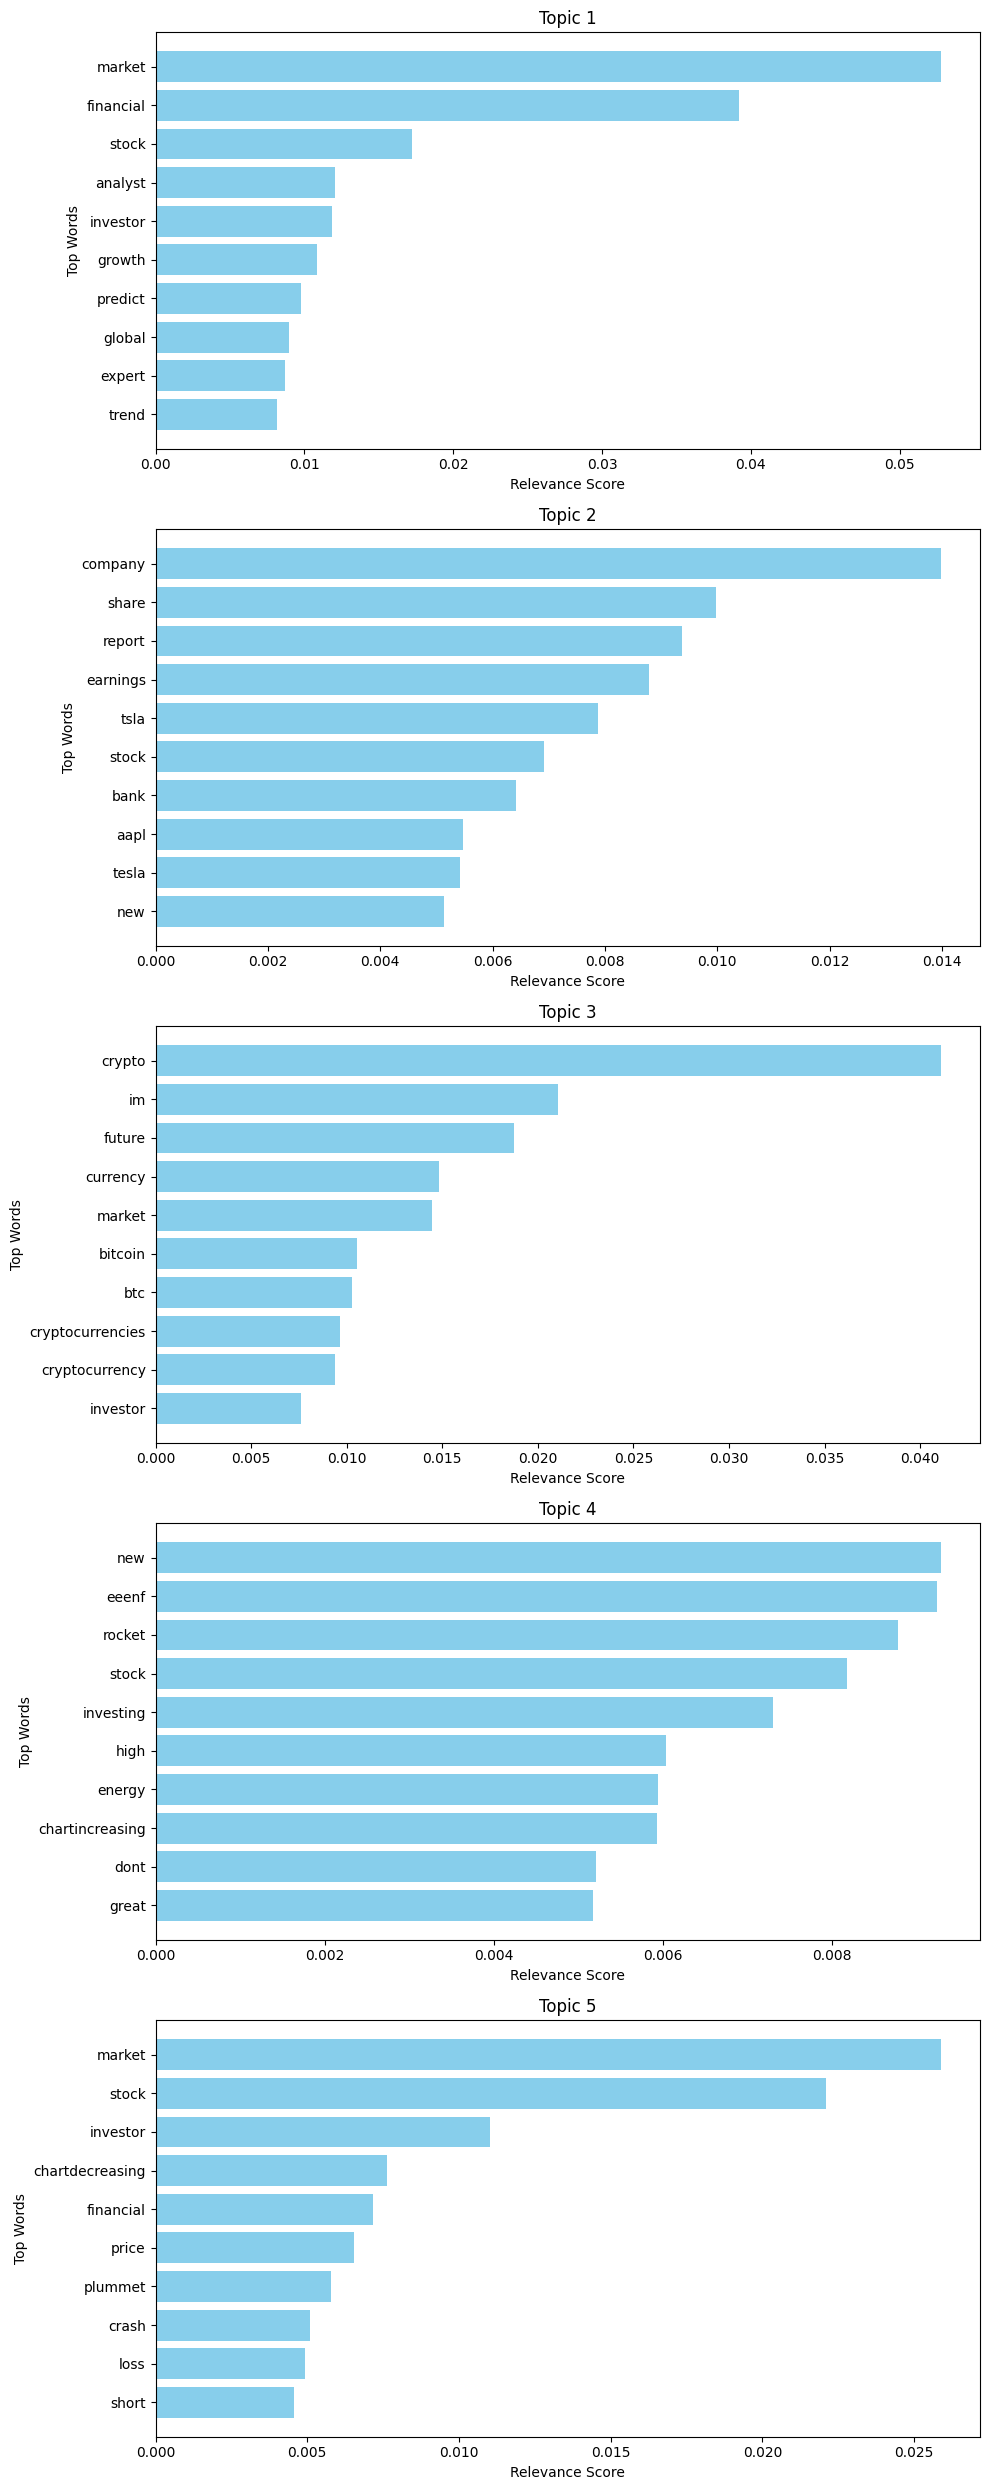

In [ ]:
import matplotlib.pyplot as plt

def visualize_topics(model, vectorizer, lambda_val=0.6, top_n=10):
    """Visualize topics with relevance-based sorting."""
    fig, axes = plt.subplots(model.n_components, 1, figsize=(10, 5 * model.n_components))
    axes = axes.flatten()

    for idx, topic in enumerate(model.components_):
        # Calculate relevance scores
        topic_scores = topic / topic.sum()  # Normalize topic weights
        relevance = lambda_val * topic_scores + (1 - lambda_val) * (topic_scores / vectorizer.get_feature_names_out().shape[0])
        top_word_indices = relevance.argsort()[-top_n:][::-1]
        top_words = [vectorizer.get_feature_names_out()[i] for i in top_word_indices]
        top_scores = relevance[top_word_indices]

        # Plot the top words
        ax = axes[idx]
        ax.barh(top_words, top_scores, color='skyblue')
        ax.set_title(f"Topic {idx + 1}")
        ax.set_xlabel("Relevance Score")
        ax.set_ylabel("Top Words")
        ax.invert_yaxis()  # Invert y-axis for a cleaner view

    plt.tight_layout()
    plt.show()

# Visualize the topics
visualize_topics(lda, vectorizer, lambda_val=0.6, top_n=10)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd

df_tweets = pd.read_csv('/content/drive/MyDrive/NLP/Bitcoin_tweets.csv', nrows=10000)


In [3]:
# Inspect the data
print(df_tweets.head())


                                  user_name    user_location  \
0                             DeSota Wilson      Atlanta, GA   
1                                  CryptoND              NaN   
2                                 Tdlmatias  London, England   
3                      Crypto is the future              NaN   
4  Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader           Europa   

                                    user_description         user_created  \
0  Biz Consultant, real estate, fintech, startups...  2009-04-26 20:05:09   
1  😎 BITCOINLIVE is a Dutch platform aimed at inf...  2019-10-17 20:12:10   
2  IM Academy : The best #forex, #SelfEducation, ...  2014-11-10 10:50:37   
3  I will post a lot of buying signals for BTC tr...  2019-09-28 16:48:12   
4  Co-founder @RENJERJerky | Forbes 30Under30 | I...  2016-02-03 13:15:55   

   user_followers  user_friends  user_favourites  user_verified  \
0          8534.0          7605             4838          False   
1          6769.0 

In [4]:
print(df_tweets.columns)  # List the columns
print(df_tweets.head())   # Show the first few rows

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')
                                  user_name    user_location  \
0                             DeSota Wilson      Atlanta, GA   
1                                  CryptoND              NaN   
2                                 Tdlmatias  London, England   
3                      Crypto is the future              NaN   
4  Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader           Europa   

                                    user_description         user_created  \
0  Biz Consultant, real estate, fintech, startups...  2009-04-26 20:05:09   
1  😎 BITCOINLIVE is a Dutch platform aimed at inf...  2019-10-17 20:12:10   
2  IM Academy : The best #forex, #SelfEducation, ...  2014-11-10 10:50:37   
3  I will post a lot of buying signals for BTC tr...  2019-09-28 16:48:12  

In [6]:
texts = df_tweets['text'].tolist()
print(texts[:5])  # Print the first 5 cleaned texts


['Blue Ridge Bank shares halted by NYSE after #bitcoin ATM announcement https://t.co/xaaZmaJKiV @MyBlueRidgeBank… https://t.co/sgBxMkP1SI', '😎 Today, that\'s this #Thursday, we will do a "🎬 Take 2" with our friend @LeoWandersleb, #Btc #wallet #security expe… https://t.co/go6aDgRml5', 'Guys evening, I have read this article about BTC and would like to share with you all - https://t.co/QxCZgmuy3B… https://t.co/o6wn7ppkVY', '$BTC A big chance in a billion! Price: \\4872644.0 (2021/02/11 08:51) #Bitcoin #FX #BTC #crypto', 'This network is secured by 9 508 nodes as of today. Soon, the biggest bears will recognise: #BTC in too big to fail… https://t.co/1XovDA8rKw']


In [7]:
print(df_tweets['text'].isnull().sum())  # Number of missing values in the column


0


In [8]:
df_tweets = df_tweets.dropna(subset=['text'])

In [9]:
df_tweets['text'] = df_tweets['text'].fillna("")

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
# Vectorize the cleaned text
vectorizer_tweets = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm_tweets = vectorizer_tweets.fit_transform(df_tweets['text'])
print("Document-Term Matrix Shape:", dtm_tweets.shape)


Document-Term Matrix Shape: (10000, 5909)


In [13]:
from sklearn.decomposition import LatentDirichletAllocation

# Apply LDA
lda_tweets = LatentDirichletAllocation(n_components=5, random_state=42)
lda_tweets.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [14]:
# Print topics
def print_topics(model, vectorizer, top_n=10, lambda_val=0.6):
    """Print topics with relevance-based sorting."""
    for idx, topic in enumerate(model.components_):
        topic_scores = topic / topic.sum()  # Normalize topic weights
        relevance = lambda_val * topic_scores + (1 - lambda_val) * (topic_scores / vectorizer_tweets.get_feature_names_out().shape[0])
        top_words = [vectorizer_tweets.get_feature_names_out()[i] for i in relevance.argsort()[-top_n:]]
        print(f"Topic {idx + 1}: {', '.join(top_words)}")

print_topics(lda_tweets, vectorizer_tweets, lambda_val=0.6)  # Adjust lambda value

Topic 1: prices, btcusd, cryptocurrency, crypto, ethereum, xrp, eth, https, bitcoin, btc
Topic 2: new, musk, just, time, cryptocurrency, crypto, elon, btc, bitcoin, https
Topic 3: cryptocurrency, dogecoin, doge, buy, elonmusk, crypto, tesla, btc, bitcoin, https
Topic 4: high, market, hour, 2021, best, 24, price, https, bitcoin, btc
Topic 5: exciting, gaming, experience, btc, platform, bitcoin, bitcoins, follow, let, https


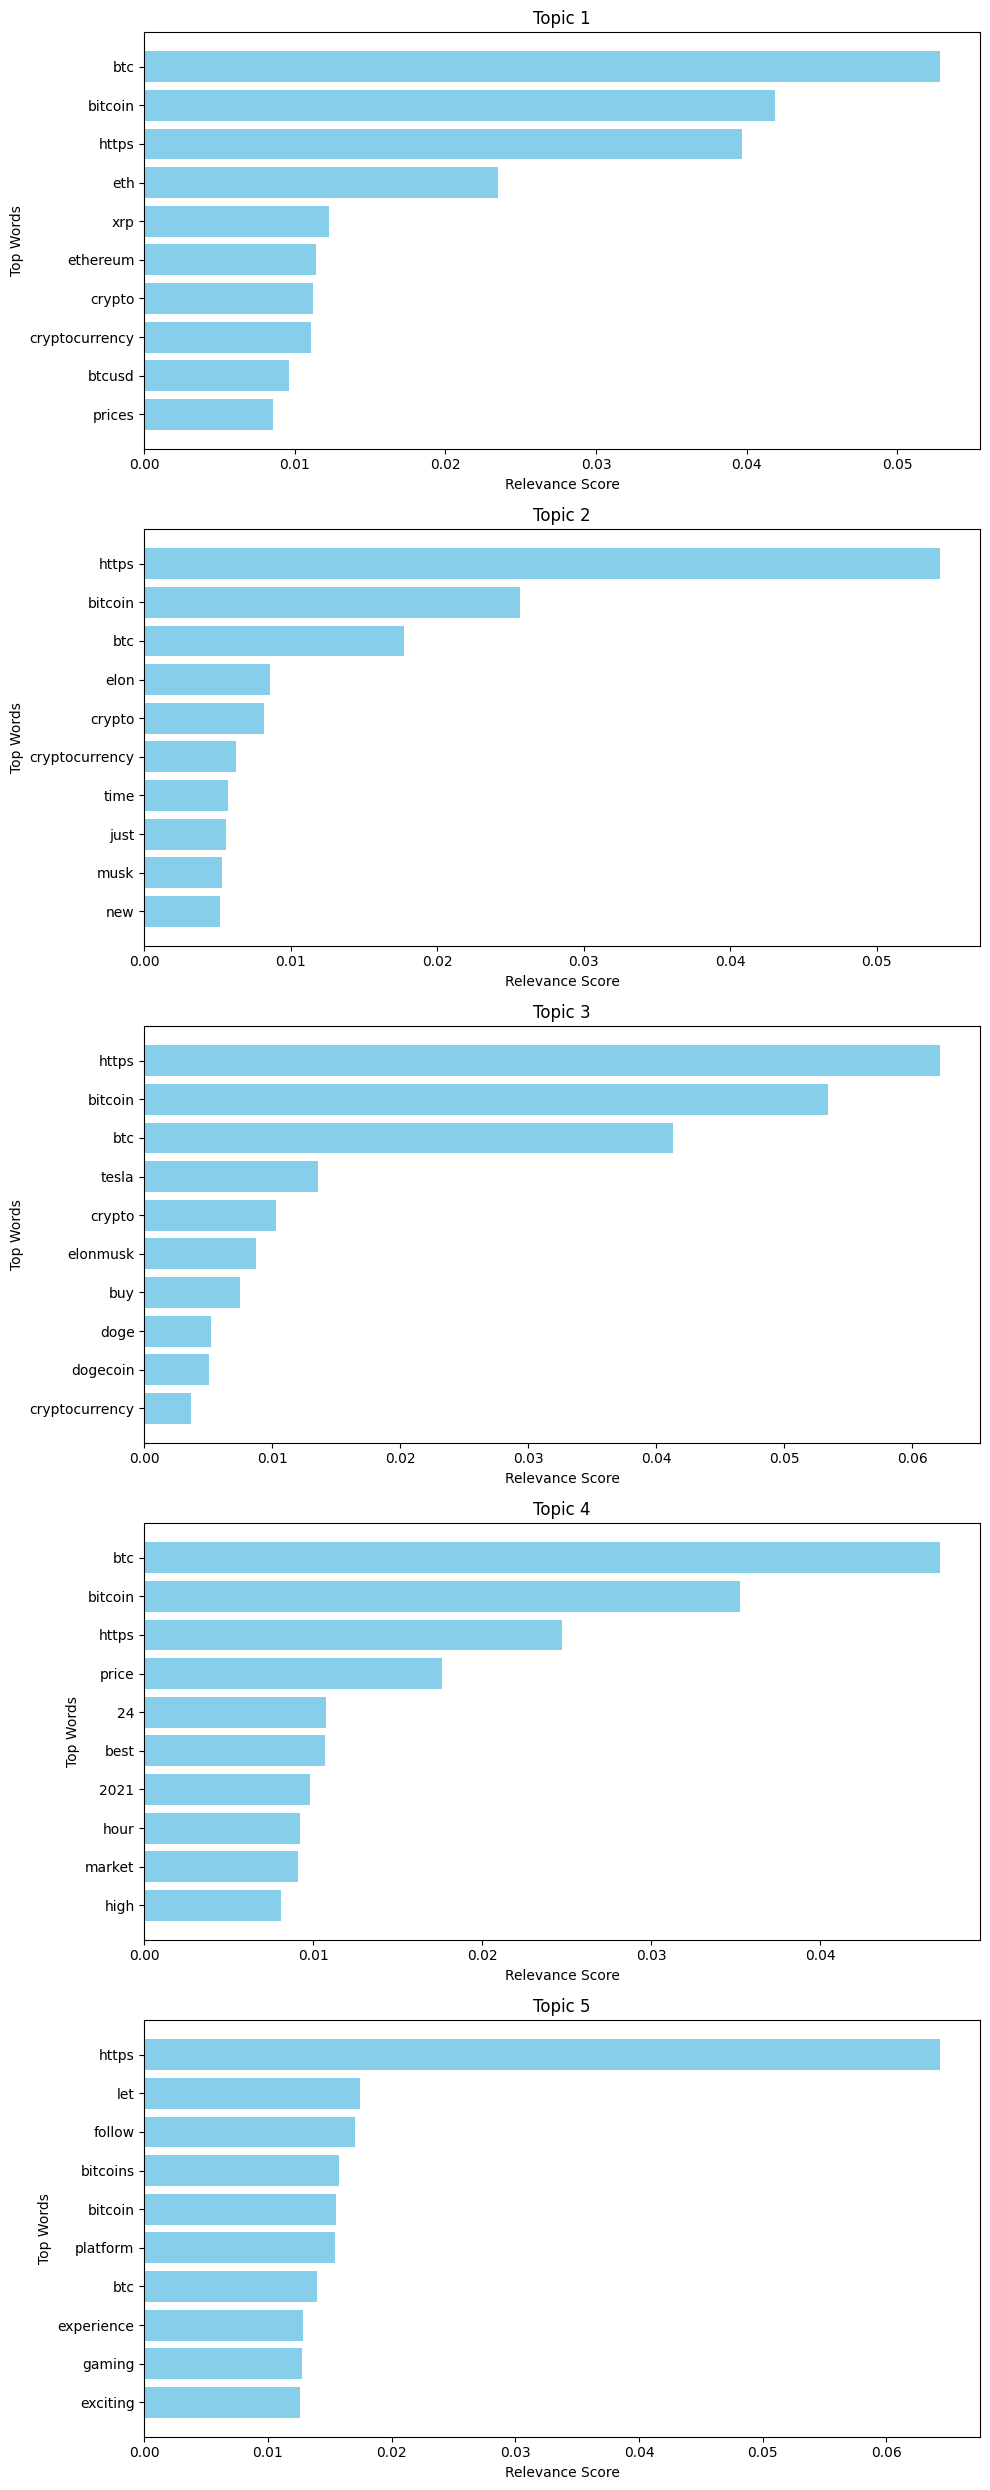

In [15]:
import matplotlib.pyplot as plt

def visualize_topics(model, vectorizer, lambda_val=0.6, top_n=10):
    """Visualize topics with relevance-based sorting."""
    fig, axes = plt.subplots(model.n_components, 1, figsize=(10, 5 * model.n_components))
    axes = axes.flatten()

    for idx, topic in enumerate(model.components_):
        # Calculate relevance scores
        topic_scores = topic / topic.sum()  # Normalize topic weights
        relevance = lambda_val * topic_scores + (1 - lambda_val) * (topic_scores / vectorizer.get_feature_names_out().shape[0])
        top_word_indices = relevance.argsort()[-top_n:][::-1]
        top_words = [vectorizer.get_feature_names_out()[i] for i in top_word_indices]
        top_scores = relevance[top_word_indices]

        # Plot the top words
        ax = axes[idx]
        ax.barh(top_words, top_scores, color='skyblue')
        ax.set_title(f"Topic {idx + 1}")
        ax.set_xlabel("Relevance Score")
        ax.set_ylabel("Top Words")
        ax.invert_yaxis()  # Invert y-axis for a cleaner view

    plt.tight_layout()
    plt.show()

# Visualize the topics
visualize_topics(lda_tweets, vectorizer_tweets, lambda_val=0.6, top_n=10)


In [17]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 34.2 MB/s eta 0:00:00


In [21]:
import pyLDAvis
import numpy as np

def prepare_custom_pyLDAvis(lda_model, dtm, vectorizer, lambda_val=0.6):
    """
    Prepare the data for pyLDAvis using custom relevance-based sorting.
    """
    # Topic-word matrix
    beta = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis]
    vocab = vectorizer.get_feature_names_out()

    # Corpus-level word frequencies
    term_frequencies = np.array(dtm.sum(axis=0)).flatten()
    term_proportion = term_frequencies / term_frequencies.sum()

    # Compute relevance-based topics
    relevance_data = []
    for idx, topic in enumerate(beta):
        relevance = lambda_val * topic + (1 - lambda_val) * (topic / term_proportion)
        top_word_indices = relevance.argsort()[-10:][::-1]  # Top 10 words for the topic
        top_words = [vocab[i] for i in top_word_indices]
        relevance_data.append({"topic": idx + 1, "words": top_words})

    return relevance_data

# Prepare the visualization
relevance_data = prepare_custom_pyLDAvis(lda_tweets, dtm_tweets, vectorizer_tweets, lambda_val=0.6)

# Create interactive visualization with pyLDAvis
pyLDAvis.enable_notebook()
lda_vis = pyLDAvis.prepare(topic_term_dists=lda_tweets.components_,
                          doc_topic_dists=lda_tweets.transform(dtm_tweets),
                          doc_lengths=dtm_tweets.sum(axis=1).getA1(),
                          vocab=vectorizer_tweets.get_feature_names_out(),
                          term_frequency=dtm_tweets.sum(axis=0).getA1())
pyLDAvis.display(lda_vis)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
